# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data.race.describe()

count     4870
unique       2
top          b
freq      2435
Name: race, dtype: object

In [7]:
data.race.sort_index().value_counts()

b    2435
w    2435
Name: race, dtype: int64

In [8]:
sum(data[data.race=='w'].call)

235.0

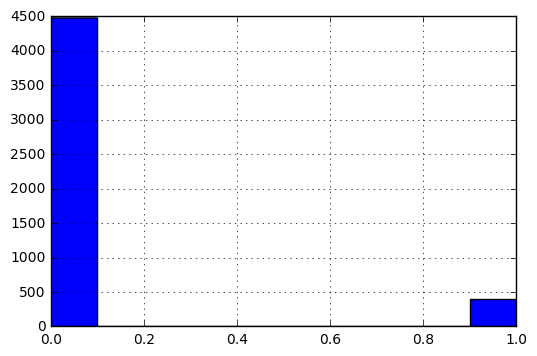

In [9]:
data.call.hist()

# Question 1
## What test is appropriate for this problem? Does CLT apply?

Since we have categorical data (or binary) we are going to use the $\chi^2$ test. The CLT applies since we have a very large sample.

We want to see if race is an important predictive feature for predicting call or no call.

# Question 2
## What are the null and alternate hypotheses?

The null hypothesis is that knowing if the name of the candidate is black sounding makes no difference in the whether or not  the candidate will be called.

Here we have a binomial distribution

In [16]:
# The probability that a black sounding will be called is
# P(Called | Race='B') = P(Called, Race='B') / P(Race='B')
n = len(data)

n_b = len(data[data.race=='b'])
p_c_and_b = sum(data[data.race=='b'].call) / n
p_b = n_b / n
p_c_b = p_c_and_b / p_b

n_w = len(data[data.race=='w'])
p_c_and_w = sum(data[data.race=='w'].call) / n
p_w = n_w / n
p_c_w = p_c_and_w / p_w
p_c_w, p_c_b

(0.096509240246406572, 0.064476386036960986)

# Question 3
## Compute margin of error, confidence interval, and p-value.

In [17]:
# Since we have a binomial distribution let's calculate the mean and var for black-sounding and white sounding
mu_c_b = n_b * p_c_b
var_c_b = n_b * p_c_b * (1 - p_c_b)


mu_c_w = n_w * p_c_w
var_c_w = n_w * p_c_w * (1 - p_c_w)

(mu_c_b, var_c_b), (mu_c_w, var_c_w)

((157.0, 146.87720739219711), (235.0, 212.32032854209444))

In [20]:
from math import sqrt
# We compute the approximate z-values
def ztest_proportion_two_samples(x1, n1, x2, n2, one_sided=False):
    p1 = x1/n1
    p2 = x2/n2    

    p = (x1+x2)/(n1+n2)
    se = p*(1-p)*(1/n1+1/n2)
    se = sqrt(se)
    
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided # if not one_sided: p *= 2
    return z, p

def compute_standard_error_prop_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2    
    se = p1*(1-p1)/n1 + p2*(1-p2)/n2
    return sqrt(se)
    
def zconf_interval_two_samples(x1, n1, x2, n2, alpha=0.05):
    p1 = x1/n1
    p2 = x2/n2    
    se = compute_standard_error_prop_two_samples(x1, n1, x2, n2)
    z_critical = stats.norm.ppf(1-0.5*alpha)
    return p2-p1-z_critical*se, p2-p1+z_critical*se

x_c_b = sum(data[data.race=='b'].call)
x_c_w = sum(data[data.race=='w'].call)

z,p = ztest_proportion_two_samples(x_c_w, n_w, x_c_b, n_b, one_sided=False)
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

ci_low,ci_upp = zconf_interval_two_samples(x_c_w, n_w, x_c_b, n_b)
print(' 95% Confidence Interval = ( {0:.2f}% , {1:.2f}% )'
      .format(100*ci_low, 100*ci_upp))

 z-stat = 4.108412152434346 
 p-value = 3.983886837577444e-05
 95% Confidence Interval = ( -4.73% , -1.68% )


In [25]:
# Now let's have the hypothesis that calling a black sounding name is more probable than a white sounding name
z,p = ztest_proportion_two_samples(x_c_b, n_b, x_c_w, n_w, one_sided=True)
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

ci_low,ci_upp = zconf_interval_two_samples(x_c_w, n_w, x_c_b, n_b)
print(' 95% Confidence Interval = ( {0:.2f}% , {1:.2f}% )'
      .format(100*ci_low, 100*ci_upp))

 z-stat = -4.108412152434346 
 p-value = 1.991943418788722e-05
 95% Confidence Interval = ( -4.73% , -1.68% )


Therefore, the probability of calling a black-sounding application is significantly different than a white sounding one. Also it is not larger than the white-sounding name with high statistical significance. This is good evidence for predicting negative outcome if you have a black-sounding name. Considering that the names were assigned randomly, having a black sounding name probably has causal relationship with the outcome

# Questions 4 and 5

Now we will run Logistic Regression to see the relative effect and significance of each factor 

In [31]:
from statsmodels.formula.api import logit
data['call'] = data.call.astype(int)
data.dtypes
model = logit("call ~ race+education+yearsexp", data).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.276495
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   call   No. Observations:                 4870
Model:                          Logit   Df Residuals:                     4866
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Feb 2017   Pseudo R-squ.:                 0.01242
Time:                        12:35:14   Log-Likelihood:                -1346.5
converged:                       True   LL-Null:                       -1363.5
                                        LLR p-value:                 2.117e-07
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -2.8814      0.289     -9.953      0.000        -3.449    -2.314
race[T.w]      0.4387      0.

We can observe that both race and years of experience are statistically significant (P>|z| < 0.05) in order to predict the result but race is almost 11 times more important (coef 0.4387 vs 0.0391)!

In [24]:
data.call.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: call, dtype: float32

For this dataset we can conclude that the race-sound of the name is the best predictive factor for an interview call we suggest that selection policies should be amended probably initially by concealing the names of the candidates